# Visualizing Decision Trees

In [121]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 30)

sns.set(context='notebook', style='whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [124]:
rnd_seed=23
np.random.seed(rnd_seed)

## Predict Breast Cancer: Decision Tree Classifier

In [125]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
wdbc_df = pd.read_csv('data/wdbc_data.csv')
wdbc_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [126]:
wdbc_df.shape

(569, 32)

In [127]:
X = wdbc_df.iloc[:, 2:]
y = wdbc_df.iloc[:, 1]

In [128]:
feature_cols = X.columns
label_col = 'diagnosis'

In [129]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [130]:
le = LabelEncoder()
y = le.fit_transform(y)

In [131]:
le.classes_

array(['B', 'M'], dtype=object)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rnd_seed, stratify=y)

In [133]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=20)

In [134]:
dtree = dtree.fit(X_train, y_train)

In [135]:
feat_imp_df = pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = feature_cols).sort_values(by=['Imp'], ascending = False)

In [136]:
feat_imp_df

,Imp
radius_worst,0.848148
concave points_worst,0.130231
concavity_mean,0.018600
radius_se,0.001851
texture_worst,0.001170
radius_mean,0.000000
concavity_se,0.000000
symmetry_worst,0.000000
concavity_worst,0.000000
compactness_worst,0.000000


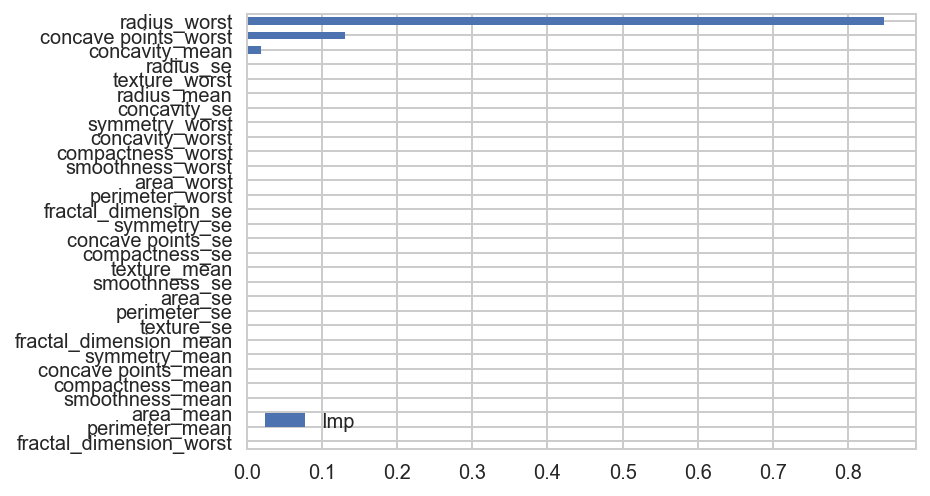

In [137]:
# a bug in pandas which plots barh in reverse order, so we need to inverse the dataframe
feat_imp_df.iloc[::-1].plot.barh();

In [138]:
print('Test Accuracy: %.3f' % dtree.score(X_test, y_test))
y_pred = dtree.predict(X_test)
y_pred_proba = dtree.predict(X_test)

Test Accuracy: 0.930


In [139]:
from sklearn import tree
import graphviz 
dot_data = export_graphviz(dtree, out_file=None, 
                         feature_names=feature_cols,
                         class_names=le.classes_,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data, format='png')  

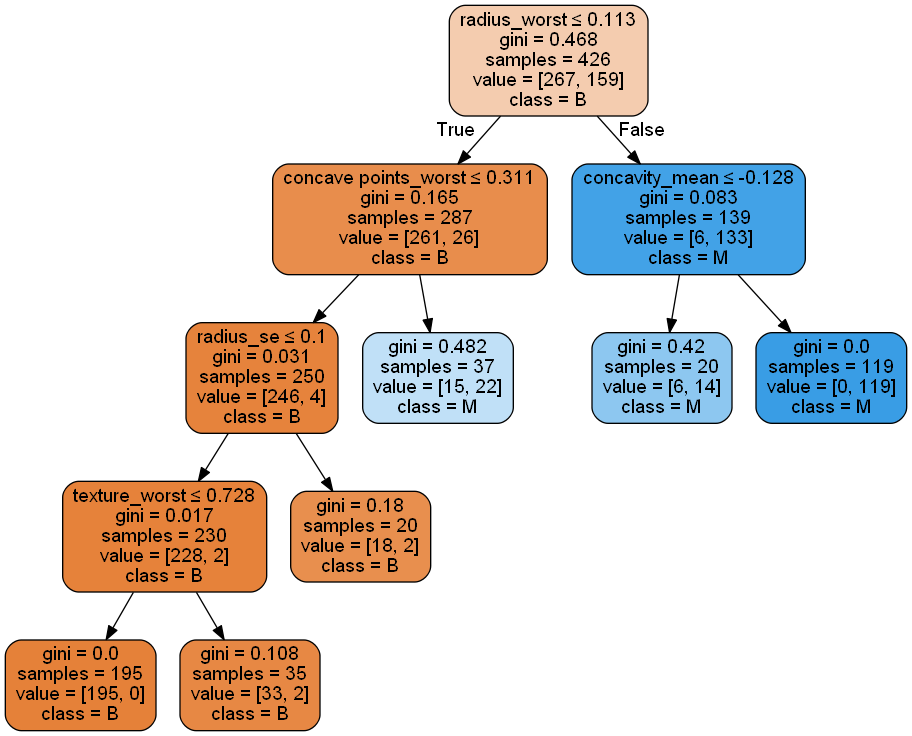

In [140]:
from IPython.display import Image 
Image(graph.pipe(), width=600)

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

accuracy on training set: 1.000000
accuracy on test set: 0.951049


In [143]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

accuracy on training set: 0.990610
accuracy on test set: 0.958042


In [144]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

accuracy on training set: 0.981221
accuracy on test set: 0.958042


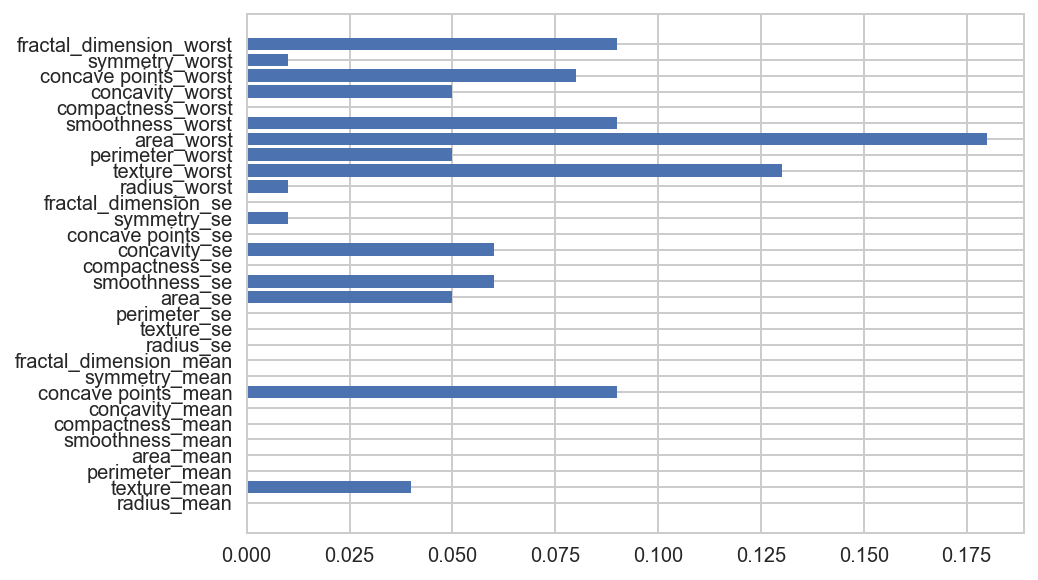

In [145]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

_= plt.barh(range(X.shape[1]), gbrt.feature_importances_)
_= plt.yticks(range(X.shape[1]), feature_cols);
ax = plt.gca()
_= ax.set_position([0.4, .2, .9, .9]);

In [146]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("accuracy on training set: %f" % xgb.score(X_train, y_train))
print("accuracy on test set: %f" % xgb.score(X_test, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

accuracy on training set: 1.000000
accuracy on test set: 0.958042


In [147]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train, y_train)
print("accuracy on training set: %f" % xgb.score(X_train, y_train))
print("accuracy on test set: %f" % xgb.score(X_test, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

accuracy on training set: 1.000000
accuracy on test set: 0.958042


In [148]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [149]:
# accuracy
np.sum(y_test == y_pred_rf) / len(y_test)

0.95804195804195802

In [150]:
# dotfile = tree.export_graphviz(dtree, out_file = "./wbdc_dtree.dot", feature_names = X_train.columns)
#from os import system
#system("dot -Tpng ./wbdc_dtree.dot -o ./wbdc_dtree.png")

## Pima Indians Diabetes Prediction: Decision Tree Classifier

In [151]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
#col_names = ['pregnant', 'glucose', 'bp', 'skin_fold', 'serum_insulin', 'bmi', 'pedigree', 'age', 'label']
#pima_df = pd.read_csv(url, header=None, names=col_names)
pima_df = pd.read_csv('data/pima_diabetes.csv')
pima_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [152]:
pima_df.shape

(768, 9)

In [153]:
X = pima_df.drop('Outcome', axis = 1)
y = pima_df['Outcome']

In [154]:
feature_cols = X.columns
label_col = 'Outcome'

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rnd_seed, stratify=y)

In [156]:
dtree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=5, min_samples_leaf=20)

In [157]:
dtree = dtree.fit(X_train, y_train)

In [158]:
feat_imp_df = pd.DataFrame(dtree.feature_importances_, columns=["Imp"], index=feature_cols).sort_values(by=['Imp'], ascending=False)

In [159]:
feat_imp_df

,Imp
Glucose,0.554296
BMI,0.205323
Age,0.124651
DiabetesPedigreeFunction,0.076357
SkinThickness,0.024873
Insulin,0.014501
Pregnancies,0.000000
BloodPressure,0.000000


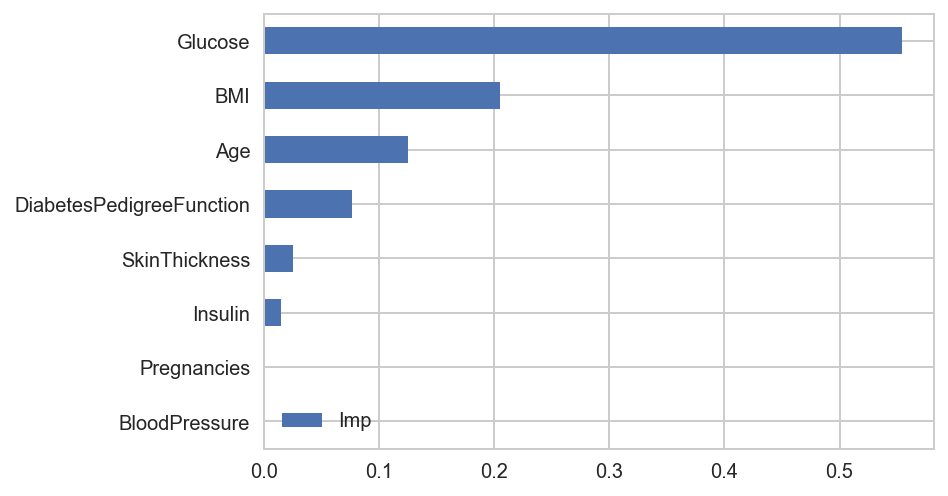

In [160]:
# a bug in pandas which plots barh in reverse order, so we need to inverse the dataframe
feat_imp_df.iloc[::-1].plot.barh();

In [161]:
print('Test Accuracy: %.3f' % dtree.score(X_test, y_test))
y_pred = dtree.predict(X_test)
y_pred_proba = dtree.predict(X_test)

Test Accuracy: 0.734


In [162]:
from sklearn import tree
import graphviz 
dot_data = export_graphviz(dtree, out_file=None, 
                         feature_names=feature_cols,
                         class_names=le.classes_,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data, format='png')  

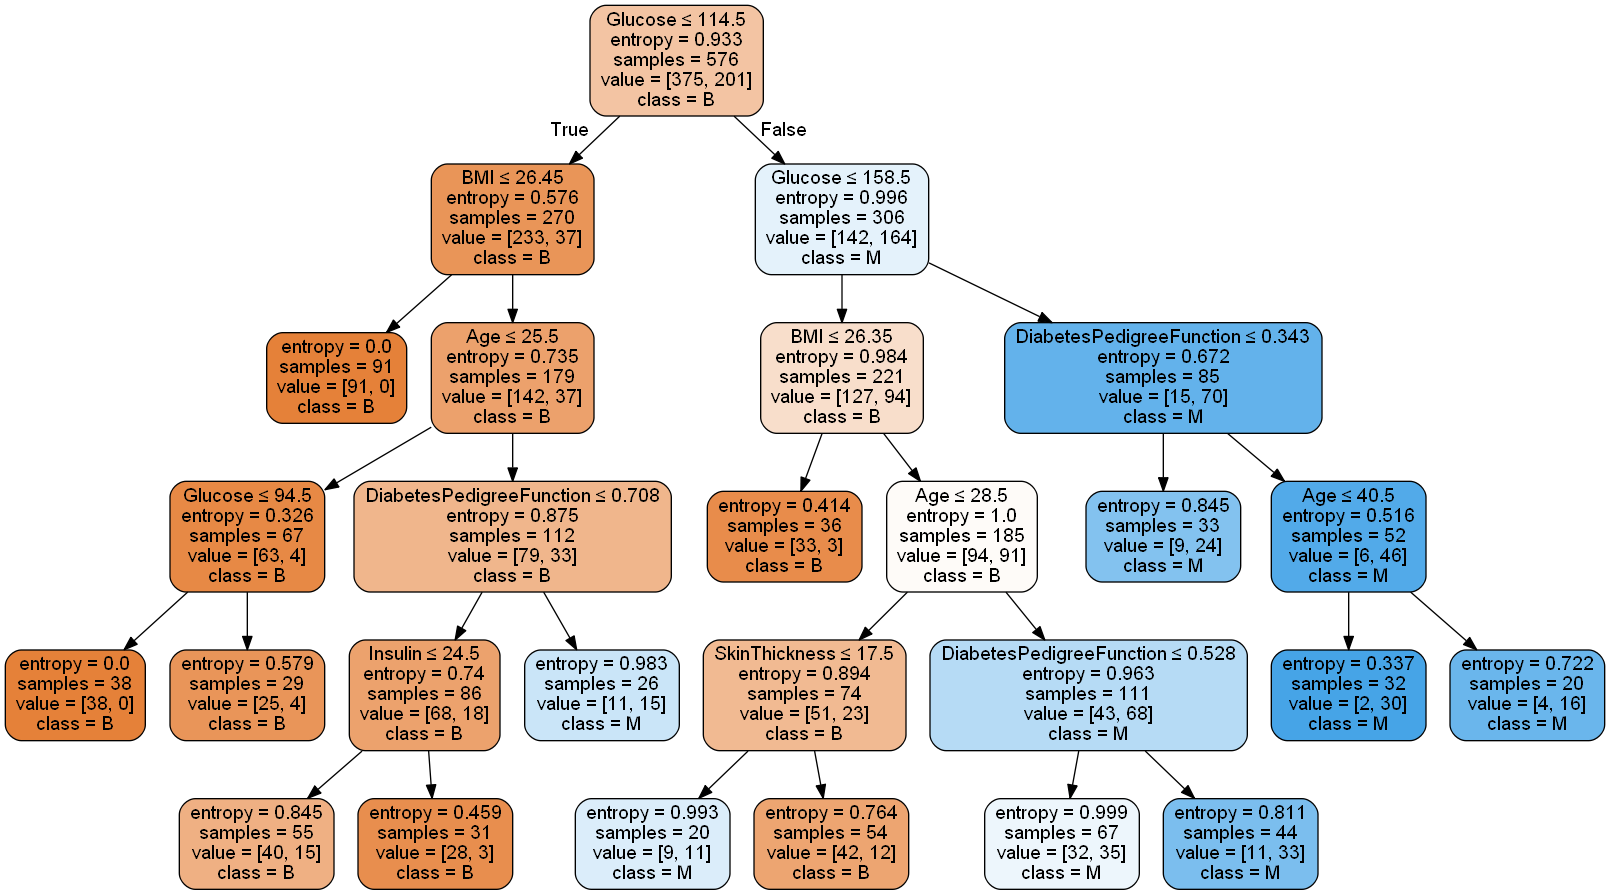

In [163]:
from IPython.display import Image 
Image(graph.pipe(), width=900)

In [164]:
#from os import system
#dotfile = open("./dtree2.dot", 'w')
#dotfile = tree.export_graphviz(dtree, out_file = "./pima_dtree.dot", feature_names = X_train.columns)
#dotfile.close()

## Predict Bikes Rental Count: Decision Tree Regressor

In [165]:
bikes = pd.read_csv('data/bikes.csv')
bikes.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


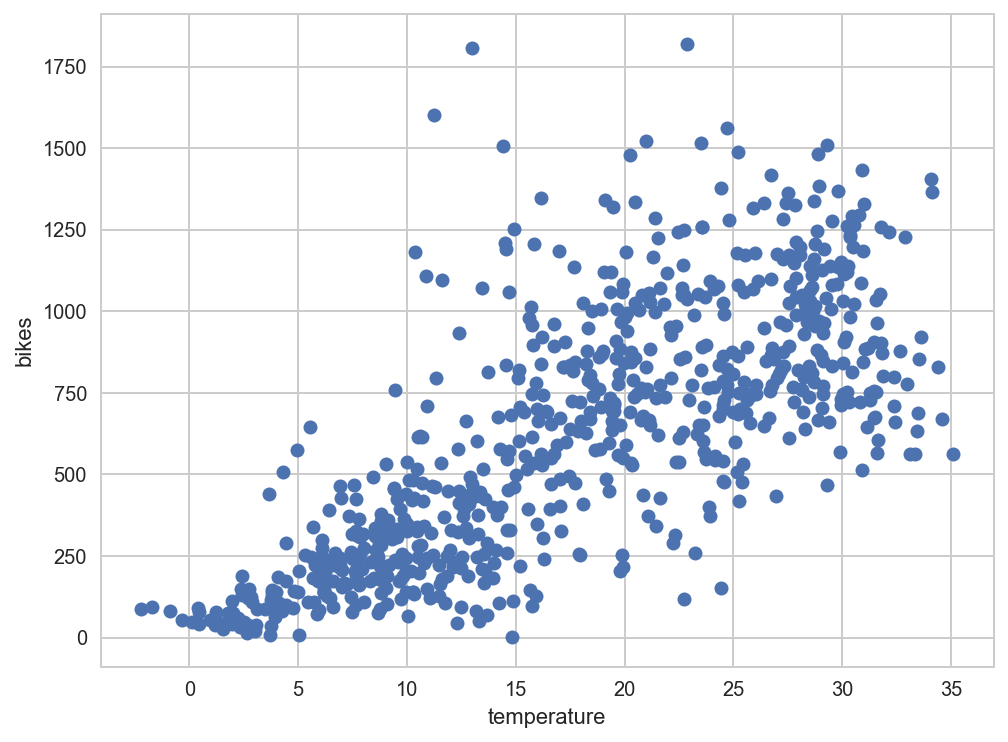

In [166]:
plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes');

In [167]:
from sklearn.tree import DecisionTreeRegressor

dregressor = DecisionTreeRegressor(max_depth=2)
dregressor.fit(bikes[['temperature']], bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

**Plotting the Decision Boundary:**

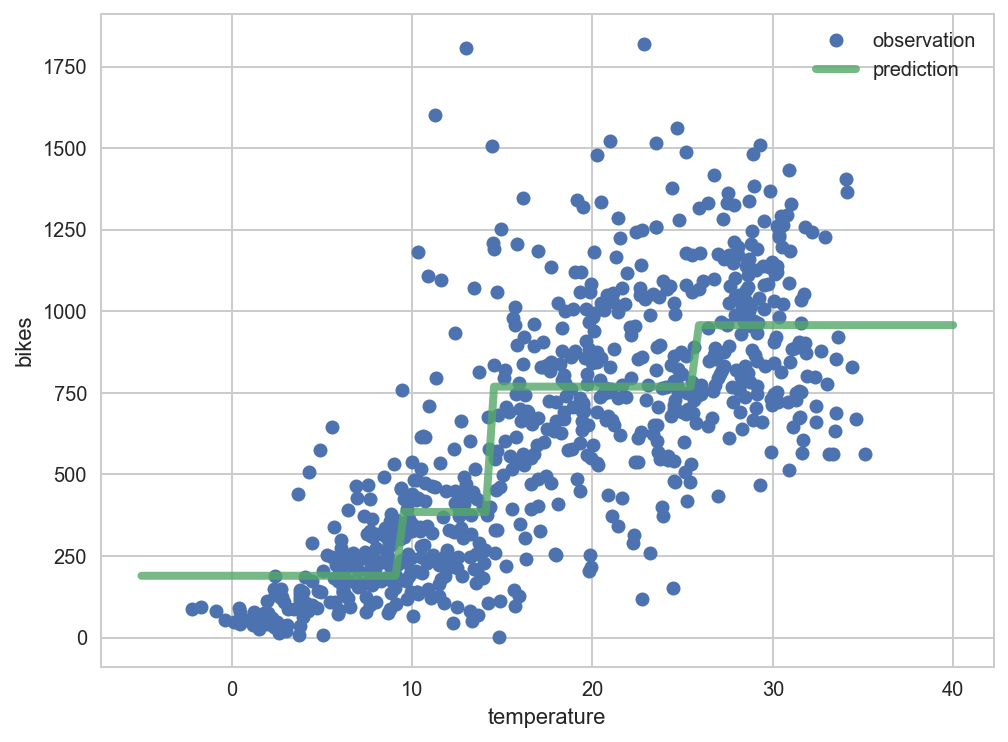

In [168]:
xx = np.expand_dims(np.linspace(-5, 40, 100), 1) # reshape a single column of data

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx, dregressor.predict(xx), linewidth=4, alpha=.8, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend();

In [173]:
from sklearn import tree
import graphviz 
dot_data = export_graphviz(dregressor, out_file=None, 
                         feature_names=['temperature'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data, format='png')  

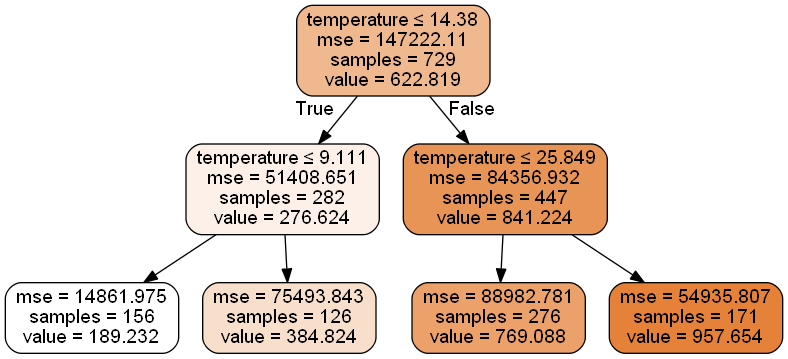

In [174]:
from IPython.display import Image 
Image(graph.pipe(), width=700)

In [51]:
from xgboost import XGBRegressor

xgbregressor = XGBRegressor()
xgbregressor.fit(bikes[['temperature']], bikes['count'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

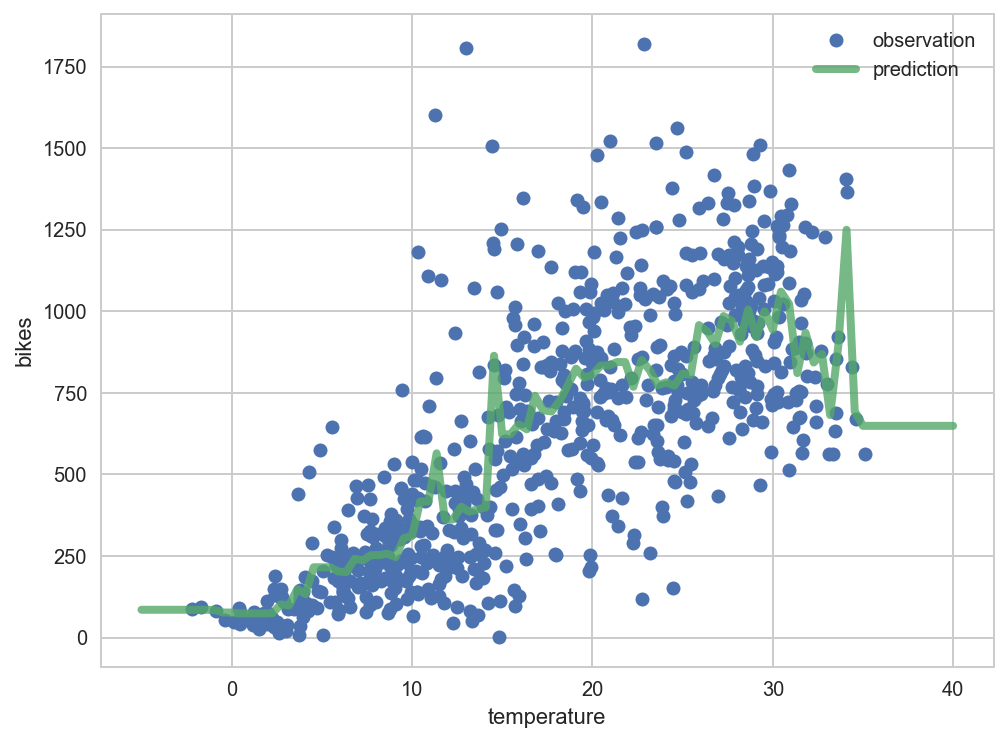

In [52]:
xx = np.linspace(-5, 40, 100)

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx,xgbregressor.predict(pd.DataFrame({'temperature': xx}, index=range(len(xx)))), linewidth=4, alpha=.8, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend();

In [53]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_reg.fit(X_train, y_train)

y_pred_rf = rnd_reg.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
gbrt_reg = GradientBoostingRegressor(random_state=0)
gbrt_reg.fit(X_train, y_train)

print("R^2 on training set: %f" % gbrt_reg.score(X_train, y_train))
print("R^2 on test set: %f" % gbrt_reg.score(X_test, y_test))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

R^2 on training set: 0.701393
R^2 on test set: 0.260019
